### 参考
代码:  
https://blog.csdn.net/weixin_39753819/article/details/141129158

定义:  
https://www.geeksforgeeks.org/damped-oscillation-definition-equation-types-examples/

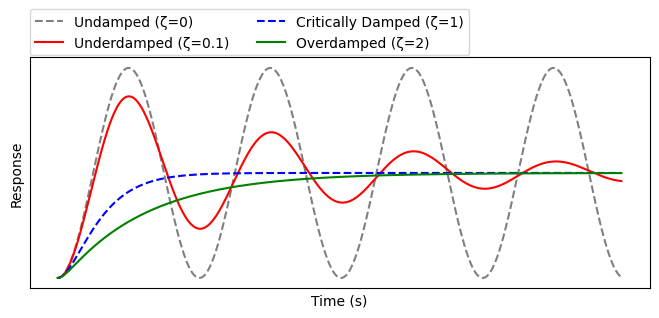

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step

# 定义系统的自然频率和时间范围
omega_n = 5.0  # 自然频率
t = np.linspace(0, 5, 500)

# 定义不同阻尼比的系统
systems = {
    'Undamped (ζ=0)': lti([omega_n**2], [1, 0, omega_n**2]),
    'Underdamped (ζ=0.1)': lti([omega_n**2], [1, 2*0.1*omega_n, omega_n**2]),
    'Critically Damped (ζ=1)': lti([omega_n**2], [1, 2*1.0*omega_n, omega_n**2]),
    'Overdamped (ζ=2)': lti([omega_n**2], [1, 2*2.0*omega_n, omega_n**2])
}

color = {
    'Undamped (ζ=0)': 'gray',
    'Underdamped (ζ=0.1)': 'red',
    'Critically Damped (ζ=1)': 'blue',
    'Overdamped (ζ=2)': 'green'
}

linestyle = {
    'Undamped (ζ=0)': 'dashed',
    'Underdamped (ζ=0.1)': '-',
    'Critically Damped (ζ=1)': 'dashed',
    'Overdamped (ζ=2)': '-'
}

# 绘制每个系统的阶跃响应
plt.figure(figsize=(8, 3))
for label, system in systems.items():
    t, y = step(system, T=t)
    plt.plot(t, y, label=label,color = color[label],linestyle=linestyle[label])


plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.grid(False)

num1 = 0
num2 = 1.01
num3 = 3
num4 = 0
plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,ncol=2)
plt.xticks([])
plt.yticks([])
plt.savefig('9-1.png', bbox_inches='tight')

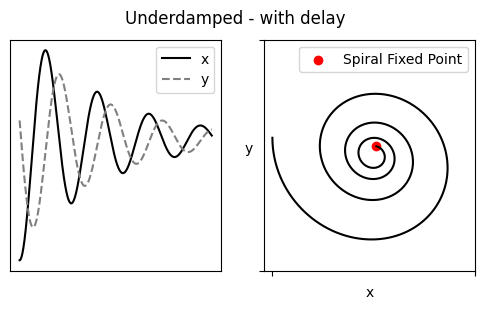

In [2]:
## Underdamped (ζ=0.1)
t = np.linspace(0, 5, 500)
fig,[ax1,ax2] = plt.subplots(1,2, figsize = (6,3))

fig.suptitle('Underdamped - with delay')

sys = systems['Underdamped (ζ=0.1)']
t, x = step(sys, T=t)
y = [2-i for i in x]

## since there's a delay in the system, say 10 
delay = 30
t = t[:-1 * delay]
x = x[:-1 * delay]
y = y[delay:]

ax1.plot(t, x, label='x',color = 'black')
ax1.plot(t, y, label='y',color = 'gray',linestyle='--')
ax1.set_xticks([])
ax1.set_yticks([])
# ax1.set_xlabel('t')
ax1.legend()


ax2.plot(x, y,color = 'black')
ax2.scatter(x[-1:], y[-1:],color = 'red',label='Spiral Fixed Point')
ax2.set_xticks([0,2],labels =['',''])
ax2.set_yticks([0,2],labels =['',''])
ax2.set_xlabel('x')
ax2.set_ylabel('y', rotation=0)
ax2.legend()
plt.savefig('9-2.png', bbox_inches='tight')

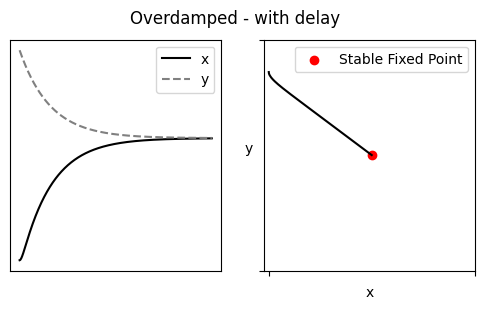

In [3]:
## Underdamped (ζ=0.1)
t = np.linspace(0, 5, 500)
fig,[ax1,ax2] = plt.subplots(1,2, figsize = (6,3))

fig.suptitle('Overdamped - with delay')

sys = systems['Overdamped (ζ=2)']
t, x = step(sys, T=t)
y = [2-i for i in x]

## since there's a delay in the system, say 10 
delay = 30
t = t[:-1 * delay]
x = x[:-1 * delay]
y = y[delay:]

ax1.plot(t, x, label='x',color = 'black')
ax1.plot(t, y, label='y',color = 'gray',linestyle='--')
ax1.set_xticks([])
ax1.set_yticks([])
# ax1.set_xlabel('t')
ax1.legend()



    
ax2.plot(x, y,color = 'black')
ax2.scatter(x[-1:], y[-1:],color = 'red',label='Stable Fixed Point')
ax2.set_xticks([0,2],labels =['',''])
ax2.set_yticks([0,2],labels =['',''])
ax2.set_xlabel('x')
ax2.set_ylabel('y', rotation=0)
ax2.legend()
plt.savefig('9-3.png', bbox_inches='tight')